<a href="https://colab.research.google.com/github/Kousick-krishna/pythonProgram/blob/main/RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN


In [31]:
N = 10000
Tp = 8000
t=np.arange(0,N)
x=np.sin(0.02*t)*2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,0.000000
1,0.019681
2,0.061445
3,0.028746
4,0.056646


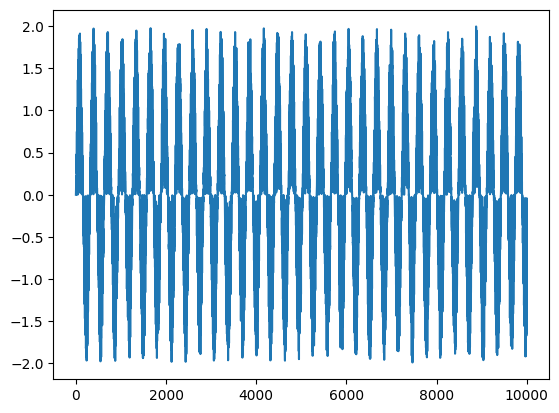

In [32]:
plt.plot(df)
plt.show()

In [33]:
values=df.values
train,test=values[0:Tp,:],values[Tp:N,:]


In [34]:
step=4
test=np.append(test,np.repeat(test[-1],step))
train=np.append(train,np.repeat(test[-1],step))

In [35]:
def convertTomatrix(data,step):
  X,Y =[], []
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)


In [36]:
trainX,trainY = convertTomatrix(train,step)
testX,testY = convertTomatrix(test,step)

In [37]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape
testX.shape

(2000, 1, 4)

In [38]:
model = Sequential()
model.add(SimpleRNN(units=32,input_shape=(1, step),activation="relu"))
model.add(Dense(0,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_8 (Dense)             (None, 0)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1185 (4.63 KB)
Trainable params: 1185 (4.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predict=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
500/500 - 3s - loss: 0.6674 - 3s/epoch - 5ms/step
Epoch 2/100
500/500 - 2s - loss: 0.6674 - 2s/epoch - 3ms/step
Epoch 3/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 2ms/step
Epoch 4/100
500/500 - 2s - loss: 0.6674 - 2s/epoch - 3ms/step
Epoch 5/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 3ms/step
Epoch 6/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 2ms/step
Epoch 7/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 2ms/step
Epoch 8/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 2ms/step
Epoch 9/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 2ms/step
Epoch 10/100
500/500 - 2s - loss: 0.6674 - 2s/epoch - 4ms/step
Epoch 11/100
500/500 - 2s - loss: 0.6674 - 2s/epoch - 3ms/step
Epoch 12/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 3ms/step
Epoch 13/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 3ms/step
Epoch 14/100
500/500 - 1s - loss: 0.6674 - 1s/epoch - 2ms/step
Epoch 15/100
500/500 - 1s - loss: 0.6674 - 926ms/epoch - 2ms/step
Epoch 16/100
500/500 - 1s - loss: 0.6674 - 902ms/epoch - 2ms/

In [40]:
trainscore=model.evaluate(trainX,trainY,verbose=0)
print(trainscore)

0.6674441695213318
